<a href="https://colab.research.google.com/github/Nastarii/ANEEL-Dataset-Analisys/blob/main/ANEEL_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving aneel_producao_energia.zip to aneel_producao_energia.zip


{'aneel_producao_energia.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xd4\x01OQt\x07o\x12\xff\xff\xff\xff\xff\xff\xff\xff\x11\x00\x14\x00ANEEL_Dataset.csv\x01\x00\x10\x00\xd4\xdc\x03\x00\x00\x00\x00\x00\xb2\xaf\x00\x00\x00\x00\x00\x00\xec\xbd\xcbr\xe4F\x92(\xba\x97\x99\xfe\x01F\xb3\xbeW2\xcbB\xe1\xfd\xa8Y%Y,*\xeb\x92Ul\x92bkf\xd3\x06fB,h2\x13\x142\x93\xa3\xae\xd5\x9d\xbb\xbf\xab\xf3\x03\xa7F\xc7l\xae\xdaL+\xcd\xd9hy\xf2O\xee\x97\x1cw\x8f\x08 \x00D\x00 \x99\xc5\xa2\xa4\xb6\xb6&Jd&\xc2\xdd\xc3\xc3_\xe1\x8fuv\x93\x8f6\xabl\x99\x8c\xf0\x9f\x7f\x9d\xa5\x7f\x9d\xa7\xd9<\xc9G\xfcq\x93\xaf\xffz\xf2\x97\xd1uR$\xcbu\x96\xfc\xf5\xdbl\x95M\x13\xf8\xd5_\x17\xe9,\x83\x8f\xe5\xebt\xf5\xd7\xdbt9\xcbf\xf9jtS\xa4\xd3\xfc\xaf7y\x81_\x9a\xe7\xd3d\x9e\xbdO\xa6\xf0\x9eo\xf3\xe5:\x1d-\xf2\xd9([\xde\xa6\xab\xf5_\xe1\x93\xb7\xd9j\x9d\x8f\xd2\x05\xfcs\x95\xfcu\x9a/Wy1\xcdr\xe3\xf3\xcf\xbe\xfe\xeap\x04\xff7^\xe5\xef\x8dYn\x9c\xc1/\x0f\xe6I\x91\x8f\xc6\xcf\xfc\xd11@\xb6\xfd17\x9c\xe7\x8ee\xf9\xa3\xbd \x1ay\xd6\xdeh\xc

In [ ]:
!unzip -qq /content/aneel_producao_energia.zip

In [ ]:
import pandas as pd

ds = pd.read_csv('/content/ANEEL_Dataset.csv')

In [ ]:
ds.describe() # Descreve elementos do banco de dados

,tipo,usina,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto,empresa_consorcio
count,1311,1311,1311,1311,1310,1310,1311,1311,1311,1311,1311,1311,1311
unique,10,1288,9,45,398,623,392,717,216,166,4,839,819
top,EOL,UTE Porto das Águas,A-5,Leilão 10/2013,"30,00","8,400",12,146,BA,Vento,PIE,"102.940.000,00",Renova Energia S.A.
freq,618,3,344,119,162,20,27,13,203,600,1304,34,45


In [ ]:
ds.head(3) # Mostra as 3 primeiras colunas

,tipo,usina,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto,empresa_consorcio
0,UHE,UHE Foz do Rio Claro,A-5,Leilão 2/2005,"68,40","41,00",41,"108,04",Caçú e São Simão/GO,Água,PIE,"281.032.620,00",Alusa Engenharia Ltda
1,UHE,UHE São José,A-5,Leilão 2/2005,"51,00","30,40",30,"115,80",Salvador das Missões e Rolador / RS,Água,PIE,"208.985.970,00",Alusa Engenharia Ltda
2,UHE,UHE Passo São João,A-5,Leilão 2/2005,"77,00","39,00",37,"112,55",Dezesseis de Novembro e Roque Gonzales / RS,Água,PIE,"267.595.880,00",Eletrosul S.A.


In [ ]:
ds.info() # Mostra as informações do banco de dados( Tipo das variáveis, Número de colunas não nulas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tipo                      1311 non-null   object
 1   usina                     1311 non-null   object
 2   tipo_de_leilao            1311 non-null   object
 3   leilao                    1311 non-null   object
 4   pot_MW                    1310 non-null   object
 5   garantia_fisica_MW_medio  1310 non-null   object
 6   lotes_vendidos            1311 non-null   object
 7   preco_por_MW              1311 non-null   object
 8   localizacao               1311 non-null   object
 9   fonte                     1311 non-null   object
 10  mod                       1311 non-null   object
 11  invest_previsto           1311 non-null   object
 12  empresa_consorcio         1311 non-null   object
dtypes: object(13)
memory usage: 133.3+ KB


In [ ]:
ds['tipo'].unique() # Mostra os valores únicos na coluna desejada ds['Nome da Coluna']
pd.concat([ds['tipo_de_leilao'], ds['mod']]).unique() # Valores únicos pra múltiplas colunas

array(['A-5', 'A-3', 'FA', 'Estruturante', 'Reserva', 'Sistema Isolado',
       'LER', 'A-4', 'A-6', 'PIE', 'AP', 'PIE/AP', 'AP c/ EXCEDENTE'],
      dtype=object)

In [ ]:
opcao = True #@param {type:"boolean"}
if opcao:
    ds['tipo'] #Mostra uma coluna
else:
    ds[['pot_MW','garantia_fisica_MW_medio']] #mostra multiplas colunas

In [ ]:
ds[ds['pot_MW'].isnull() | ds['garantia_fisica_MW_medio'].isnull()] # Procura valores nulos nas colunas

,tipo,usina,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto,empresa_consorcio
196,UTE,UTE Santana do Araguaia I (Produto:Santana do ...,Sistema Isolado,Leilão 2/2010,NaN,NaN,"4,564","148,5",Santa do Araguaia/PA,Cavaco/Resíduo de Madeira,PIE,"121.745.000,00",Gaia Energia e Participações S.A.


In [ ]:
ds.columns[12] #Acessa o titulo da coluna ( Nota: tem um espaço após o nome que deve ser considerado ao tentar acessá-la)

'empresa_consorcio '

In [ ]:
ds = ds.drop(index=196, axis=0)

In [ ]:
import numpy as np

categoricas = np.array(['tipo','fonte','usina','tipo_de_leilao','leilao','localizacao','mod','empresa_consorcio ']) # Vetor de dados categóricos
numericas = np.array(['pot_MW','garantia_fisica_MW_medio', 'lotes_vendidos', 'preco_por_MW', 'invest_previsto']) # Vetor de dados numéricos

In [ ]:
ds[categoricas].apply(lambda x : pd.factorize(x)[0]).corr() # Mostra a correlação dos dados categóricos

,tipo,fonte,usina,tipo_de_leilao,leilao,localizacao,mod,empresa_consorcio
tipo,1.000000,0.314636,0.422190,0.347468,0.436610,0.393387,-0.100606,0.407081
fonte,0.314636,1.000000,0.862574,0.732041,0.862689,0.438068,-0.080124,0.821891
usina,0.422190,0.862574,1.000000,0.609085,0.981786,0.592559,-0.106426,0.951751
tipo_de_leilao,0.347468,0.732041,0.609085,1.000000,0.599804,0.184489,-0.049087,0.540831
leilao,0.436610,0.862689,0.981786,0.599804,1.000000,0.670132,-0.132216,0.950520
localizacao,0.393387,0.438068,0.592559,0.184489,0.670132,1.000000,-0.177214,0.618317
mod,-0.100606,-0.080124,-0.106426,-0.049087,-0.132216,-0.177214,1.000000,-0.109310
empresa_consorcio,0.407081,0.821891,0.951751,0.540831,0.950520,0.618317,-0.109310,1.000000


In [ ]:
ds = ds.drop(columns=categoricas[[2,7]],axis=1) # Remove as colunas com mais correlação

In [ ]:
categoricas = np.delete(categoricas,[2,7]) # Atualiza o vetor dos dados categóricos

In [ ]:
ds.describe()

,tipo,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto
count,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
unique,10,9,45,398,623,391,716,216,166,4,839
top,EOL,A-5,Leilão 10/2013,"30,00","8,400",12,146,BA,Vento,PIE,"102.940.000,00"
freq,618,344,119,162,20,27,13,203,600,1303,34


In [ ]:
ds[numericas] = ds[numericas].apply(lambda x: x.str.replace('.','')) # replace('troca isso', 'por isso') 
ds[numericas] = ds[numericas].apply(lambda x: x.str.replace(',','.')) # Nota: lambda é similar a criar funções para um objeto

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
ds.head(3) # !Atenção ao valor de invest_previsto muitos pontos e dois 0 referentes aos centavos

,tipo,tipo_de_leilao,leilao,pot_MW,garantia_fisica_MW_medio,lotes_vendidos,preco_por_MW,localizacao,fonte,mod,invest_previsto
0,UHE,A-5,Leilão 2/2005,68.40,41.00,41,108.04,Caçú e São Simão/GO,Água,PIE,281032620.00
1,UHE,A-5,Leilão 2/2005,51.00,30.40,30,115.80,Salvador das Missões e Rolador / RS,Água,PIE,208985970.00
2,UHE,A-5,Leilão 2/2005,77.00,39.00,37,112.55,Dezesseis de Novembro e Roque Gonzales / RS,Água,PIE,267595880.00


In [ ]:
ds = pd.get_dummies(data=ds, columns=categoricas) #One Hot Encoding (Fundamental para equalizar a distância de dados categóricos)

In [ ]:
target = 'invest_previsto' #@param variável resultante do modelo de ML

In [ ]:
#@title >>> lstring('valores a esquerda serão removidos')  ---------------------- >>> [:-n] passa por toda a palavra menos os n ultimos caracteres >>> Nota: Apenas algumas correções na tabela
ds[target] = ds[target].map(lambda x: (x.lstrip('R$ ').rstrip(' ')[:-3]))
ds[target] = ds[target].apply(lambda x: x.replace(' ','').replace('.',''))

In [ ]:
x_test = ds[ds[target] == ''] #Colunas vazias, serão utilizadas como teste do modelo de ML
ds = ds[ds[target] != '']

In [ ]:
ds[numericas] = ds[numericas].astype(float)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1310
Columns: 455 entries, pot_MW to mod_PIE/AP
dtypes: float64(5), uint8(450)
memory usage: 635.1 KB


In [ ]:
#ds = (ds-ds.min())/(ds.max()-ds.min())

In [ ]:
x = ds.drop(columns=[target],axis= 1)
y = pd.DataFrame(ds[target])

In [ ]:
x, y

(      pot_MW  garantia_fisica_MW_medio  ...  mod_PIE  mod_PIE/AP
 0       68.4                     41.00  ...        1           0
 1       51.0                     30.40  ...        1           0
 2       77.0                     39.00  ...        1           0
 3      337.7                    191.30  ...        1           0
 4       82.0                     38.50  ...        1           0
 ...      ...                       ...  ...      ...         ...
 1306     8.4                      4.00  ...        1           0
 1307     8.4                      4.10  ...        1           0
 1308     8.4                      4.00  ...        1           0
 1309     8.4                      4.00  ...        1           0
 1310    22.5                     12.86  ...        1           0
 
 [1306 rows x 454 columns],       invest_previsto
 0        2.810326e+08
 1        2.089860e+08
 2        2.675959e+08
 3        1.441506e+09
 4        2.624179e+08
 ...               ...
 1306     3.360000

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=21)

In [ ]:
len(x_train),len(x_val)

(979, 327)

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Regressor para saída numérica e Classifier para categórica

reg = RandomForestRegressor(max_depth=5,n_estimators = 1000, random_state = 42) # Criando a Regressão
y_train = np.ravel(y_train)
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=42)

In [ ]:
estimator = reg.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x.columns,
                class_names = y.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

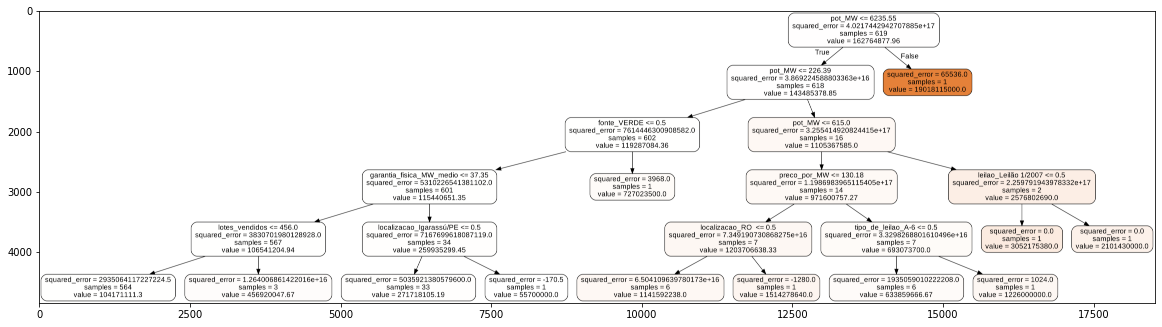

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/content/tree.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

In [ ]:
y_pred = pd.Series(reg.predict(x_val)) # Faz a validação e transforma em um Serie

In [ ]:
y_val.reset_index(drop=True, inplace=True)

df = pd.concat( [y_val, y_pred.rename('invest_previsto_com_ML')], axis=1) 
df.astype(object)

,invest_previsto,invest_previsto_com_ML
0,76682000.0,80905105.683629
1,76660000.0,124839944.168176
2,102940000.0,121010665.767297
3,208147450.0,127144306.14304
4,52227000.0,73333799.224141
...,...,...
322,102258910.0,121010665.767297
323,1777429780.0,1014558625.912393
324,30147050.0,72569748.284392
325,128700000.0,121539412.17291


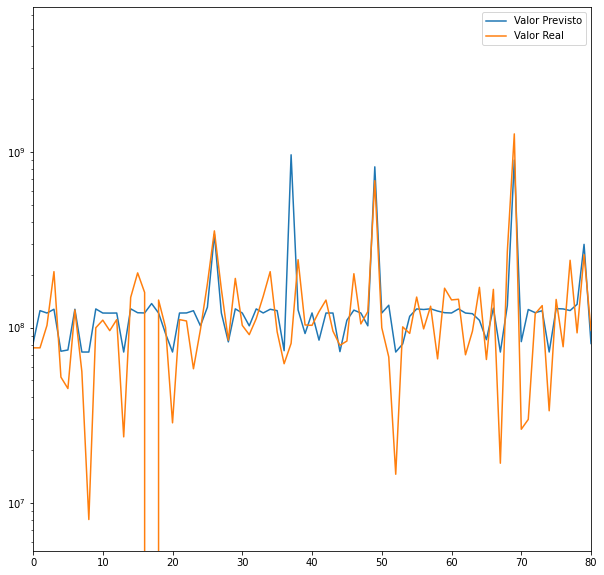

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(df.index, df['invest_previsto_com_ML'],label='Valor Previsto')
ax.plot(df.index, df['invest_previsto'],label='Valor Real')
ax.set_xlim(left=0,right=80)
ax.legend()
plt.yscale('log')

plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [ ]:
x_test = x_test.drop(columns=['invest_previsto'])

In [ ]:
numericas = numericas[np.where(numericas != target)] # Atualiza as colunas numericas
x_test[numericas] = x_test[numericas].astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1271 to 1285
Columns: 454 entries, pot_MW to mod_PIE/AP
dtypes: float64(4), uint8(450)
memory usage: 1.9 KB


In [ ]:
reg.predict(x_test) #Completando os valores da tabela

array([7.33337992e+07, 7.30231091e+07, 3.16588735e+08, 1.24917653e+08])